In [29]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats


import warnings
warnings.filterwarnings('ignore')


#Magical function of jupyter notebook that gives the output of plotting commands is displayed inline 
#directly below the code cell that produced it.
%matplotlib inline

#reading the csv file
df=pd.read_csv('bcan.csv')

#argument to watch all the columns
pd.pandas.set_option('display.max_columns', None)



In [30]:
#watching the first 5 rows
#It looks like id and Unnamed: 32 columns are of no use to us
#Also, diagnosis seems to be out target column
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [31]:
np.array(df)

array([[842302, 'M', 17.99, ..., 0.4601, 0.1189, nan],
       [842517, 'M', 20.57, ..., 0.275, 0.08902, nan],
       [84300903, 'M', 19.69, ..., 0.3613, 0.08757999999999999, nan],
       ...,
       [926954, 'M', 16.6, ..., 0.2218, 0.0782, nan],
       [927241, 'M', 20.6, ..., 0.4087, 0.124, nan],
       [92751, 'B', 7.76, ..., 0.2871, 0.07039, nan]], dtype=object)

In [32]:
#dropping unnecessary rows
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

# Statistical Analysis

In [33]:
#checking out the some basic info of our data
#Except the target variable all other columns are of type float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [34]:
#converting the output type from categorical to numerical
df['diagnosis']=pd.get_dummies(df['diagnosis'],drop_first=True)



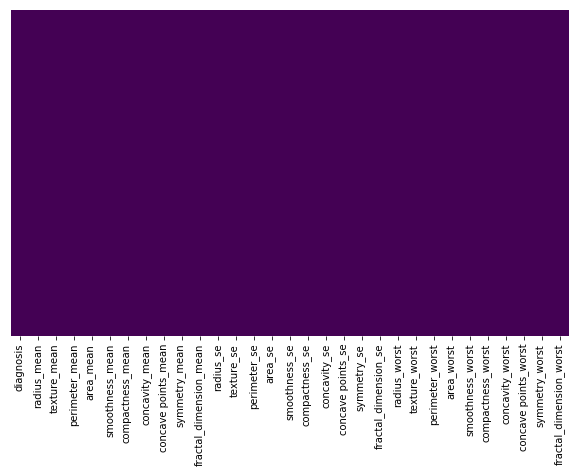

In [35]:
#checking if there are any null values
#Luckily there are no null values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [36]:
#Making data classified into features as X and target output as y
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [37]:
#Splitting data into train and test split
from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=101)

In [38]:
#Making sure both training and testing data has same number of features
print('Training data: ',X_train.shape)
print('\n')
print('Testing data: ',X_test.shape)

Training data:  (398, 30)


Testing data:  (171, 30)


In [39]:
#Part 1:- Statistics

#checking out some basic stats of the data
#We get an idea of the outliers 
#Further we will dive deep and engineer the outliers
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [40]:
#All the features appear to be of Numerical Continuous type
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [41]:
#Though df.describe() gives almost all of statistical measurement but still, there are still some of measurements
#which are not included

#We will create a simple dataframe of those values

np.array(X.mean())
col=['Mean','Median','Mode','Std','Skewness','Kurtosis']
ind=X.columns


In [42]:
mod=[1.234e+01, 1.493e+01, 8.261e+01, 5.122e+02, 1.007e-01, 1.147e-01,
        0.000e+00, 0.000e+00, 1.601e-01, 5.667e-02, 2.204e-01, 8.561e-01,
        1.778e+00, 1.664e+01, 5.080e-03, 1.104e-02, 0.000e+00, 0.000e+00,
        1.344e-02, 1.784e-03, 1.236e+01, 1.770e+01, 1.017e+02, 2.844e+02,
        1.216e-01, 1.486e-01, 0.000e+00, 0.000e+00, 2.226e-01, 7.427e-02]


In [43]:
df_stats=pd.DataFrame(data=[np.array(X.mean()),
                   np.array(X.median()),
                   mod,
                   np.array(X.std()),
                   np.array(X.skew()),
                   np.array(X.kurtosis())],columns=ind,index=col)

In [44]:
#Inferences from this dataframe are 

#1) Data does not seem to be normally distributed.

#2) Values are way too out of scale from each other

#3) None of the values seems to be negatively skewed which means all of the mean values are greater than the median

#4) Except concave_points_worst all other features have positive kurtosis

df_stats

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
Median,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
Mode,12.340000,14.930000,82.610000,512.200000,0.100700,0.114700,0.000000,0.000000,0.160100,0.056670,0.220400,0.856100,1.778000,16.640000,0.005080,0.011040,0.000000,0.000000,0.013440,0.001784,12.360000,17.700000,101.700000,284.400000,0.121600,0.148600,0.000000,0.000000,0.222600,0.074270
Std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
Skewness,0.942380,0.650450,0.990650,1.645732,0.456324,1.190123,1.401180,1.171180,0.725609,1.304489,3.088612,1.646444,3.443615,5.447186,2.314450,1.902221,5.110463,1.444678,2.195133,3.923969,1.103115,0.498321,1.128164,1.859373,0.415426,1.473555,1.150237,0.492616,1.433928,1.662579
Kurtosis,0.845522,0.758319,0.972214,3.652303,0.855975,1.650130,1.998638,1.066556,1.287933,3.005892,17.686726,5.349169,21.401905,49.209077,10.469840,5.106252,48.861395,5.126302,7.896130,26.280847,0.944090,0.224302,1.070150,4.396395,0.517825,3.039288,1.615253,-0.535535,4.444560,5.244611


In [45]:
#This function will give out the confidence interval for all the feartures at 95%
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

for num_cols in X:
    print (num_cols)
    print(mean_confidence_interval(df[num_cols]))
    print('\n')

radius_mean
(14.127291739894552, 13.83711655080376, 14.417466928985345)


texture_mean
(19.289648506151142, 18.935495107926062, 19.64380190437622)


perimeter_mean
(91.96903339191564, 89.9682207569746, 93.96984602685669)


area_mean
(654.8891036906855, 625.9119941173284, 683.8662132640426)


smoothness_mean
(0.09636028119507908, 0.09520222089483824, 0.09751834149531993)


compactness_mean
(0.10434098418277679, 0.09999230663169262, 0.10868966173386096)


concavity_mean
(0.0887993158172232, 0.08223507346222733, 0.09536355817221906)


concave points_mean
(0.04891914586994728, 0.04572406447365224, 0.05211422726624232)


symmetry_mean
(0.18116186291739894, 0.17890453202819473, 0.18341919380660315)


fractal_dimension_mean
(0.06279760984182776, 0.06221624953436705, 0.06337897014928848)


radius_se
(0.40517205623901575, 0.382337731659574, 0.4280063808184575)


texture_se
(1.2168534270650264, 1.1714299143575169, 1.262276939772536)


perimeter_se
(2.866059226713533, 2.6995768490661525, 3.032541

# EDA

radius_mean


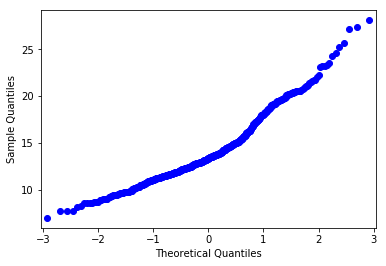

texture_mean


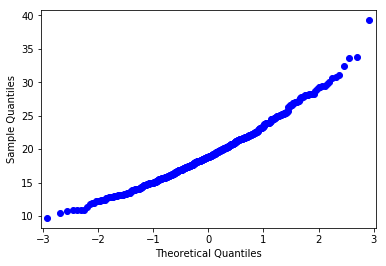

perimeter_mean


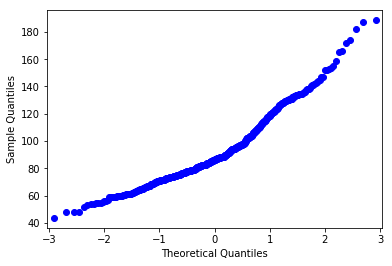

area_mean


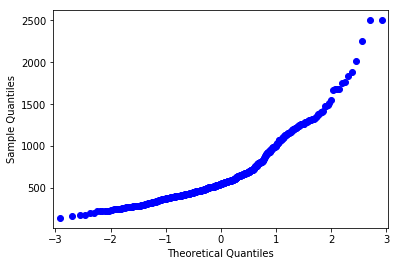

smoothness_mean


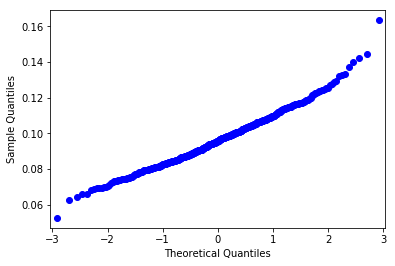

compactness_mean


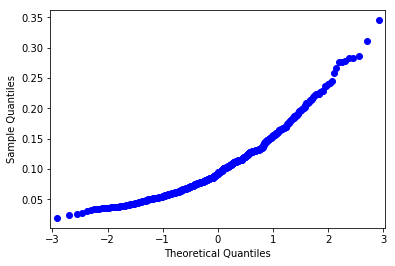

concavity_mean


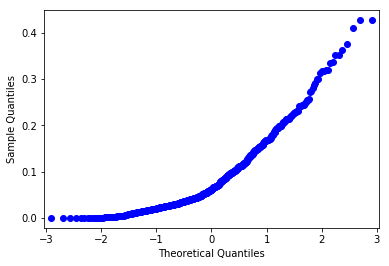

concave points_mean


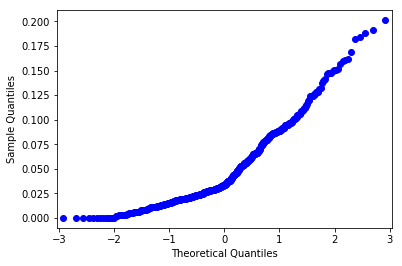

symmetry_mean


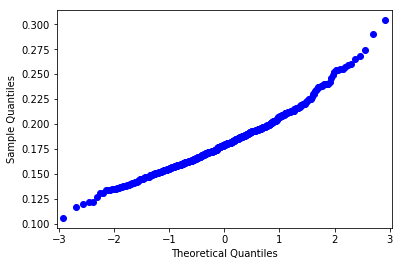

fractal_dimension_mean


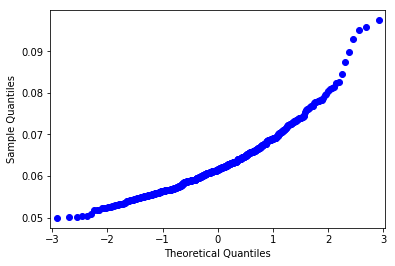

radius_se


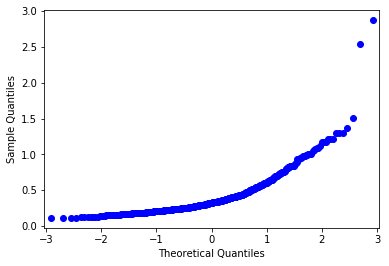

texture_se


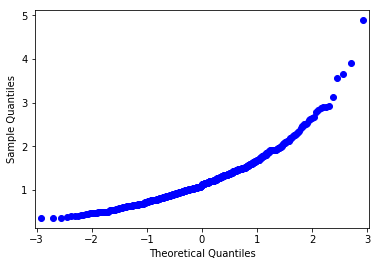

perimeter_se


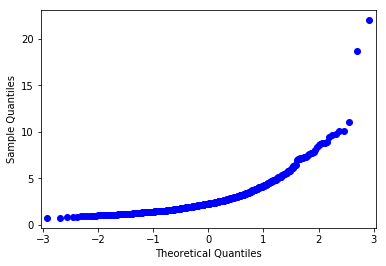

area_se


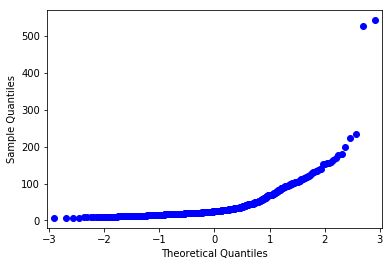

smoothness_se


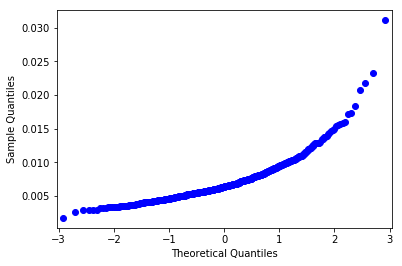

compactness_se


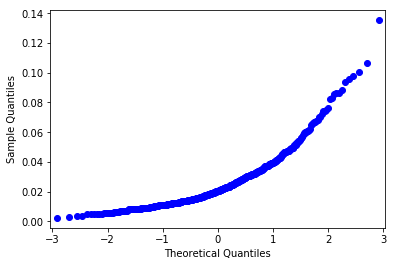

concavity_se


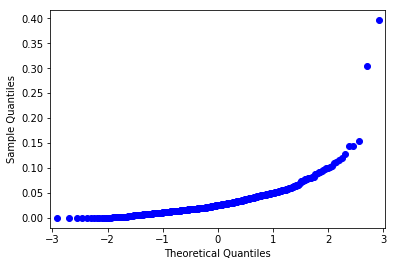

concave points_se


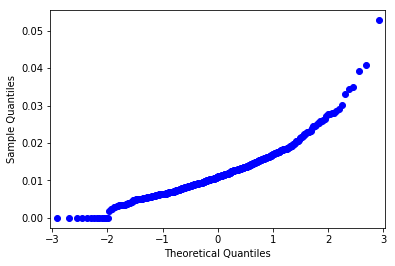

symmetry_se


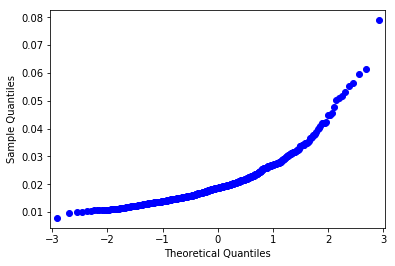

fractal_dimension_se


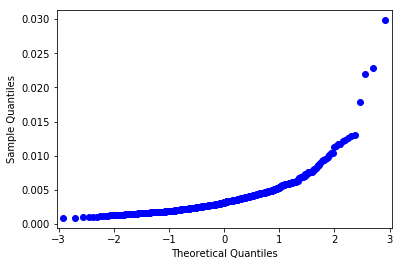

radius_worst


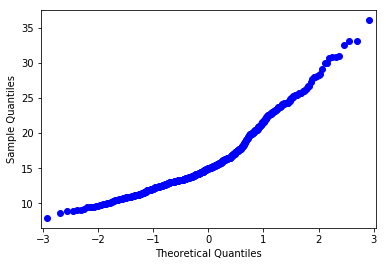

texture_worst


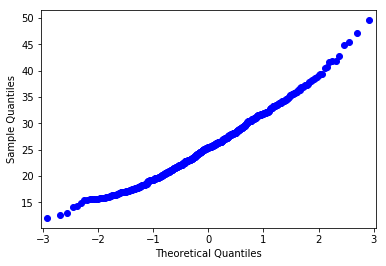

perimeter_worst


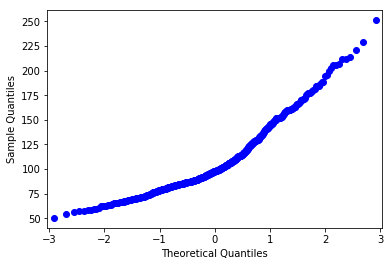

area_worst


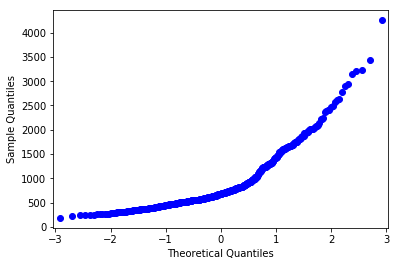

smoothness_worst


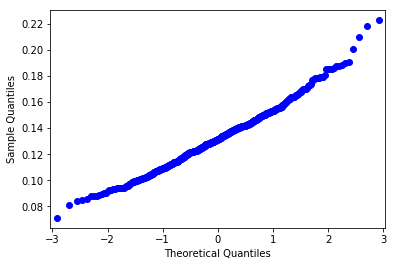

compactness_worst


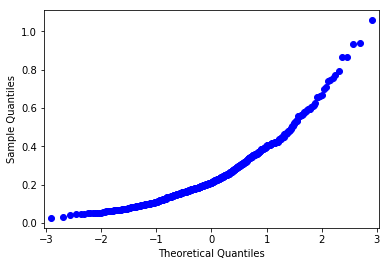

concavity_worst


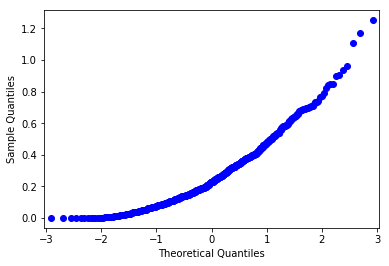

concave points_worst


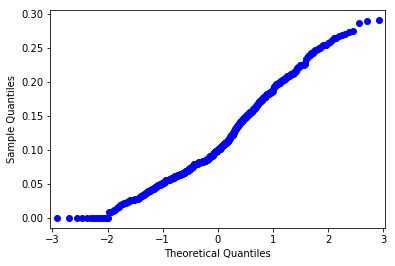

symmetry_worst


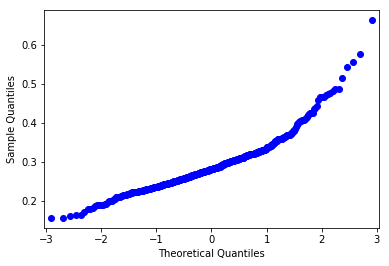

fractal_dimension_worst


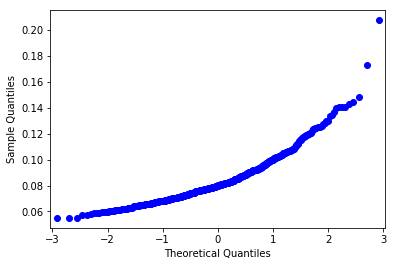

In [46]:
#Let's check how normally distributed is our data
for num_cols in X:
    print (num_cols)
    sm.qqplot(df[num_cols])
    plt.show()

In [47]:
# QQ plot gave us an idea but to be statistically significant we have to use some kind of test

#In this example we will use Shapiro-Wilk test whose H0 is that data is normally distributed

#None of the p value is greater than our alpha level (0.05) so we will reject the null hypothesis which means none of our data
#is normally distributed

for num_cols in X:
    print (num_cols)
    print(stats.shapiro(df[num_cols]))
    print('\n')


radius_mean
(0.9410696029663086, 3.1061551985026026e-14)


texture_mean
(0.9767200946807861, 7.281473557441132e-08)


perimeter_mean
(0.9361826181411743, 7.01163031715385e-15)


area_mean
(0.8584018349647522, 3.196511088521129e-22)


smoothness_mean
(0.987487256526947, 8.59934589243494e-05)


compactness_mean
(0.9169784784317017, 3.967941392408286e-17)


concavity_mean
(0.8668309450149536, 1.3385831077542155e-21)


concave points_mean
(0.8916499018669128, 1.4044357116065472e-19)


symmetry_mean
(0.972588062286377, 7.88199550072477e-09)


fractal_dimension_mean
(0.9232836961746216, 1.956494436320316e-16)


radius_se
(0.7455540895462036, 1.2245553698549864e-28)


texture_se
(0.8961676359176636, 3.5603670776690514e-19)


perimeter_se
(0.7181644439697266, 7.587720866535223e-30)


area_se
(0.563820481300354, 2.6527208249479415e-35)


smoothness_se
(0.8384096622467041, 1.3619356940226007e-23)


compactness_se
(0.8368780612945557, 1.0828804875356465e-23)


concavity_se
(0.6720700263977051, 1.

radius_mean


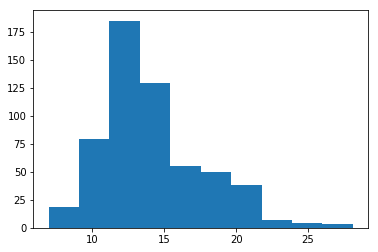

texture_mean


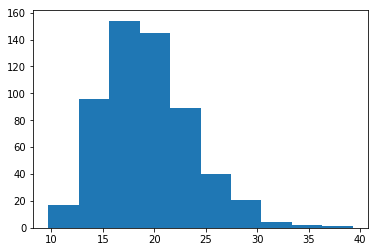

perimeter_mean


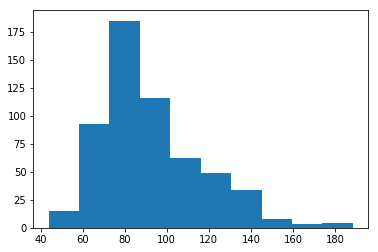

area_mean


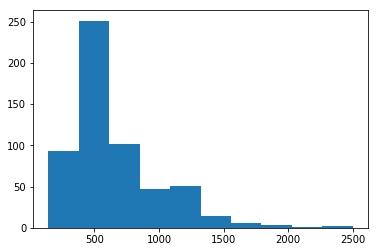

smoothness_mean


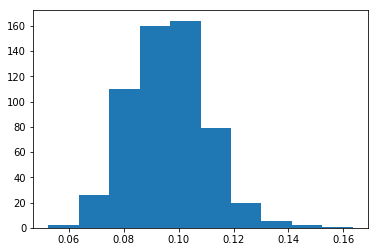

compactness_mean


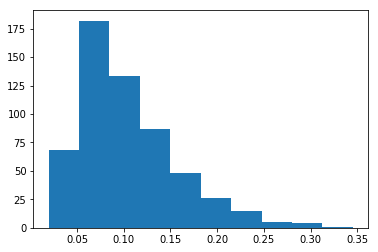

concavity_mean


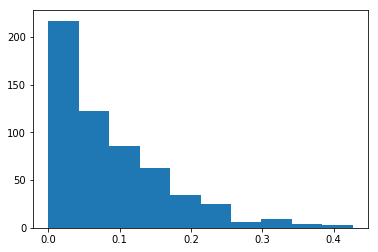

concave points_mean


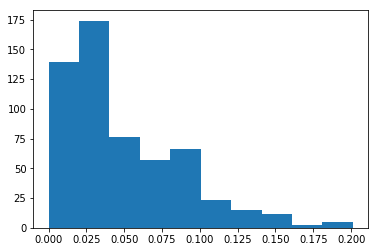

symmetry_mean


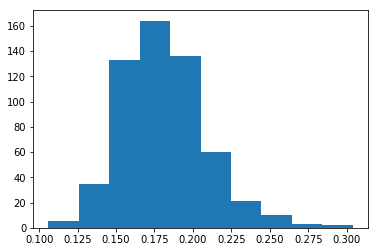

fractal_dimension_mean


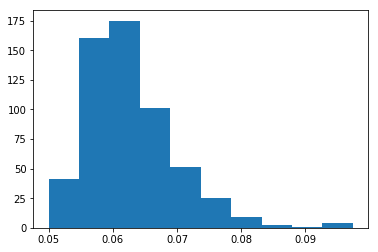

radius_se


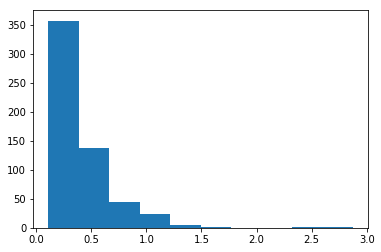

texture_se


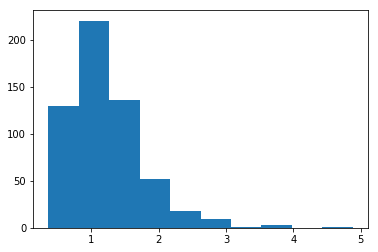

perimeter_se


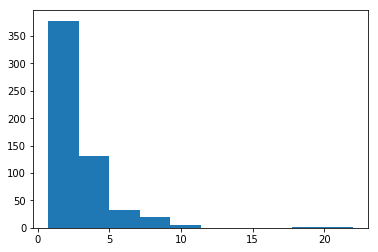

area_se


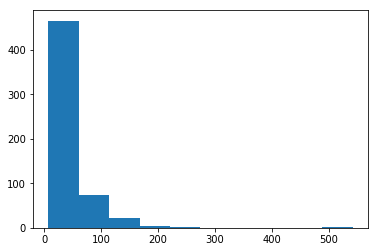

smoothness_se


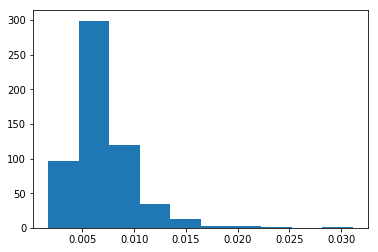

compactness_se


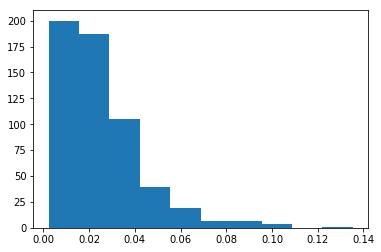

concavity_se


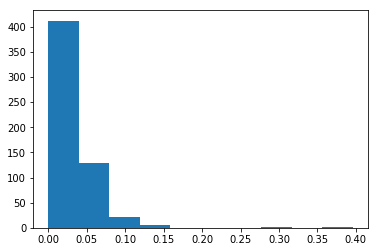

concave points_se


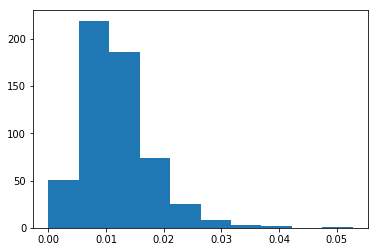

symmetry_se


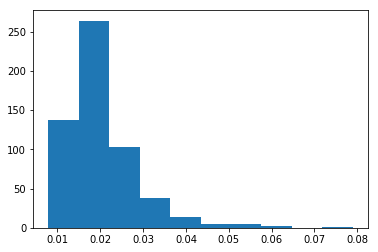

fractal_dimension_se


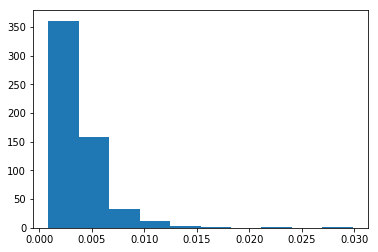

radius_worst


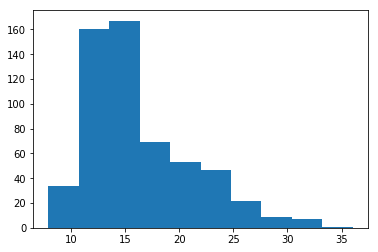

texture_worst


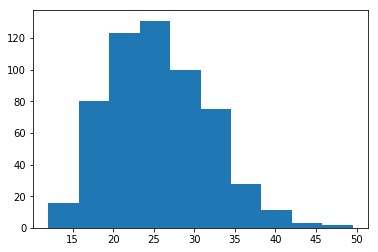

perimeter_worst


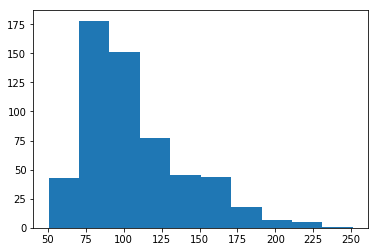

area_worst


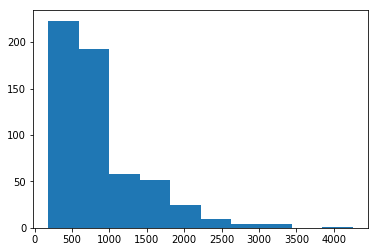

smoothness_worst


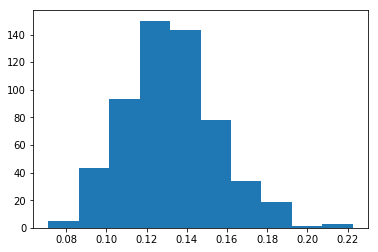

compactness_worst


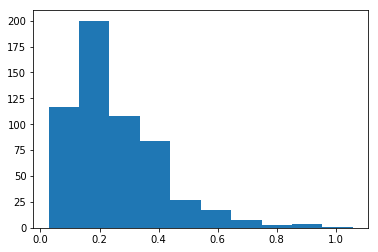

concavity_worst


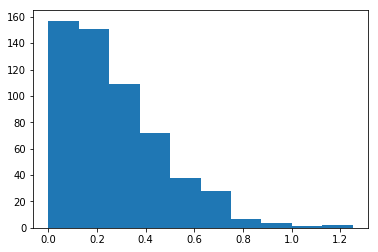

concave points_worst


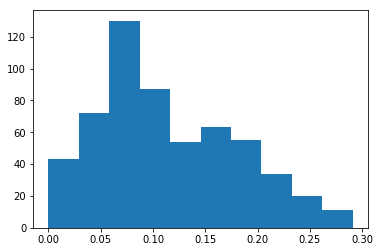

symmetry_worst


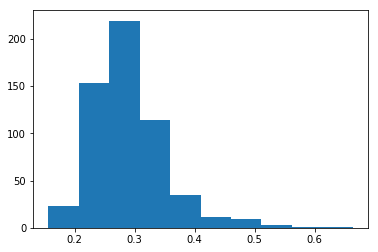

fractal_dimension_worst


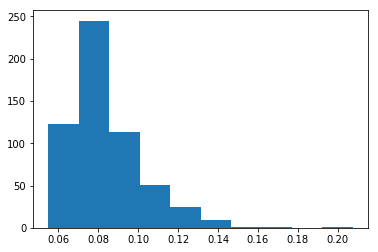

In [48]:
#This loop returns the histogram plot for every feature
#As observed earlier some of the data appears to be kind of normally distributed other all are positively skewed
for num_cols in X:
    print(num_cols)
    plt.hist((df[num_cols]))
    plt.show()

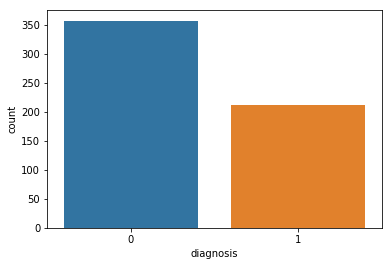

In [49]:
#It 
sns.countplot(y)

In [50]:
(y.value_counts()) / len(y) * 100

0    62.741652
1    37.258348
Name: diagnosis, dtype: float64

In [51]:
(y.value_counts()/y.count()*100)

0    62.741652
1    37.258348
Name: diagnosis, dtype: float64

radius_mean


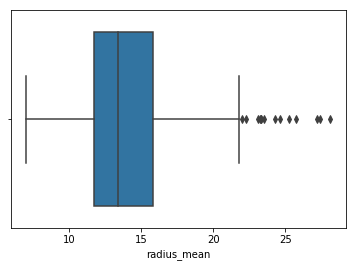

texture_mean


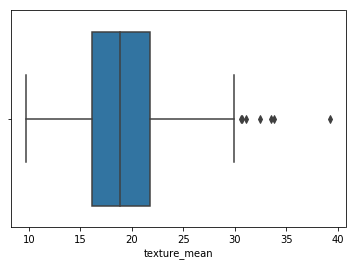

perimeter_mean


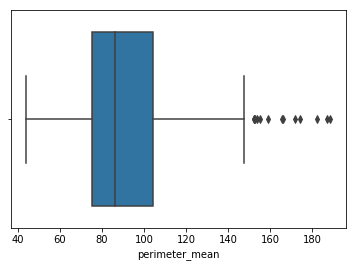

area_mean


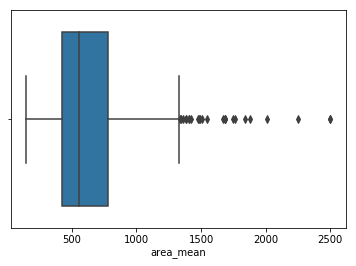

smoothness_mean


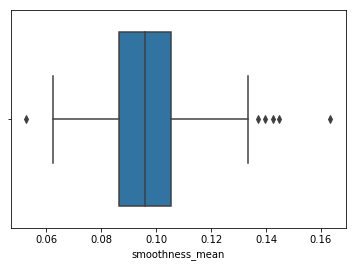

compactness_mean


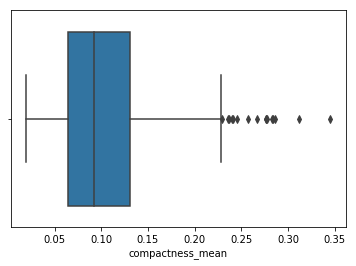

concavity_mean


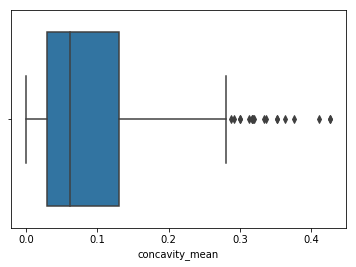

concave points_mean


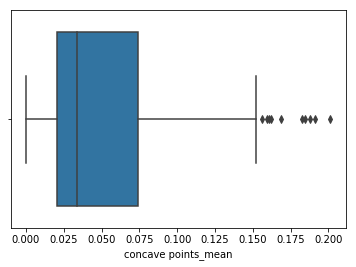

symmetry_mean


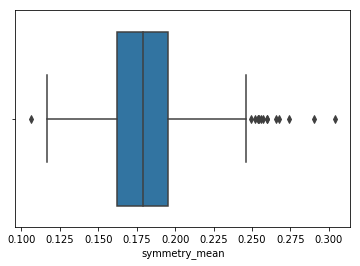

fractal_dimension_mean


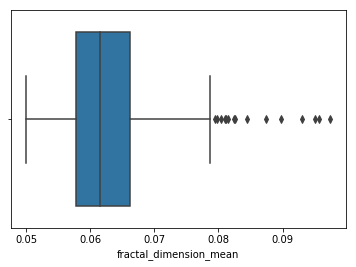

radius_se


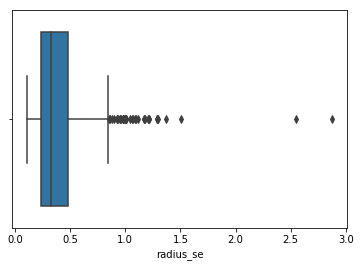

texture_se


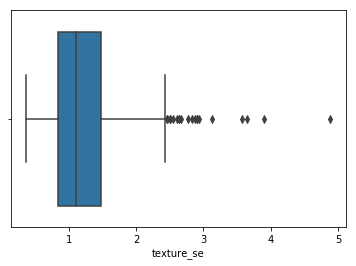

perimeter_se


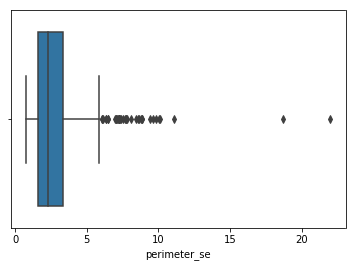

area_se


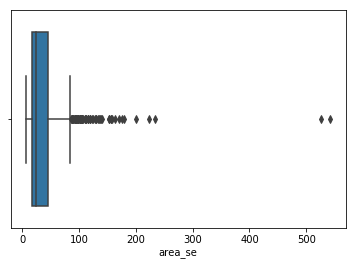

smoothness_se


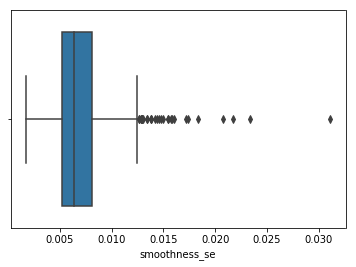

compactness_se


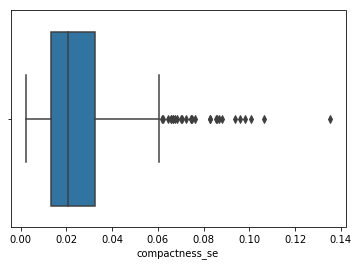

concavity_se


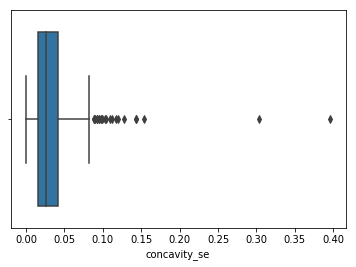

concave points_se


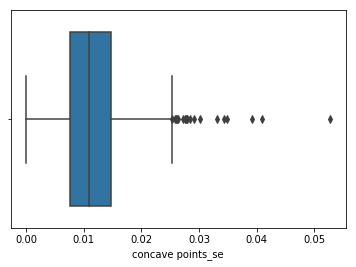

symmetry_se


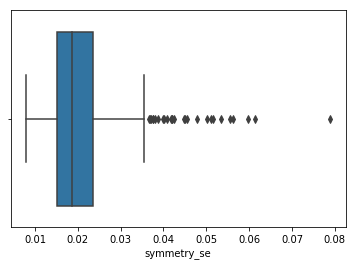

fractal_dimension_se


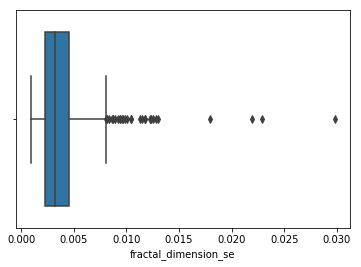

radius_worst


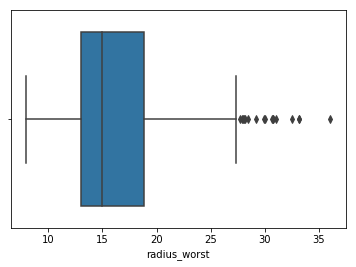

texture_worst


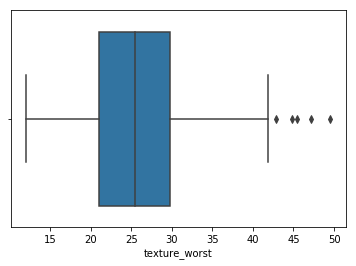

perimeter_worst


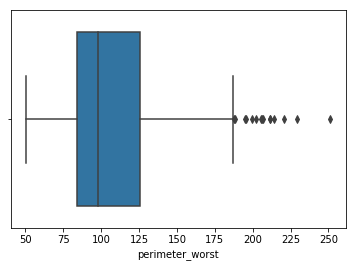

area_worst


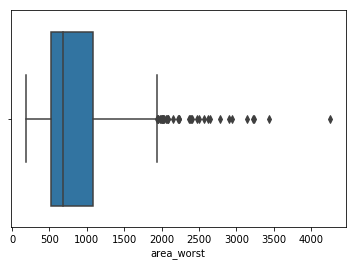

smoothness_worst


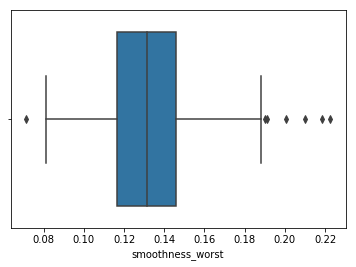

compactness_worst


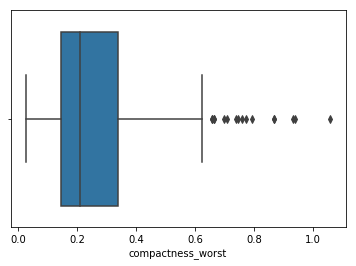

concavity_worst


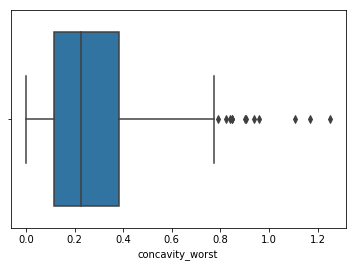

concave points_worst


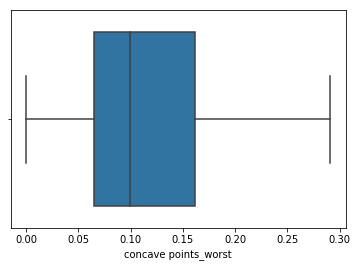

symmetry_worst


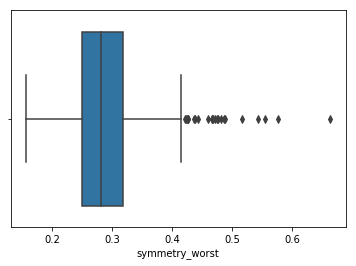

fractal_dimension_worst


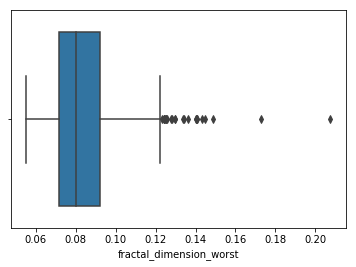

In [52]:
#Checking for outliers in out dataset
#It appears the outliers are lying at only the upper extreme values
#We will feature engineer them later and see if it makes any difference
for num_cols in X:
    print(num_cols)
    sns.boxplot(x=num_cols,data=X)
    plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

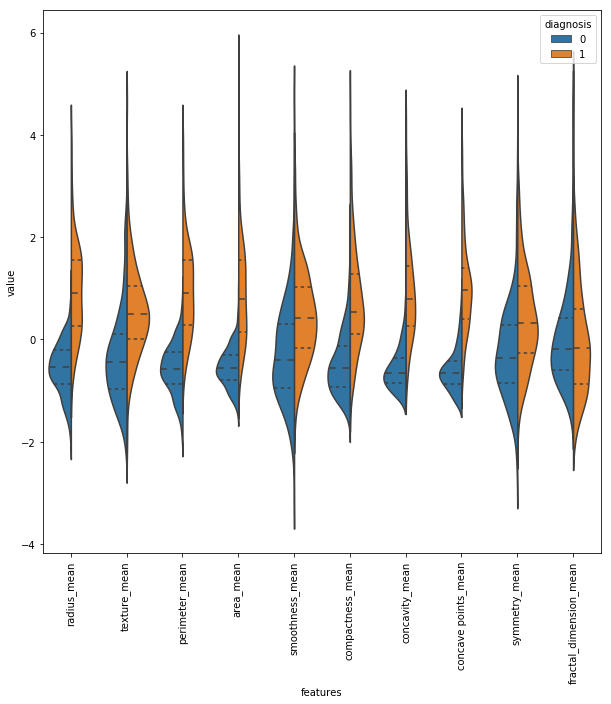

In [53]:
# Now we will plot violin plots for the features (10 at a time)
# We will standardize our values so we can visualize them in a single graph
# There are some features whose distribution are already a great fit for classification problem

# First 10 features
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

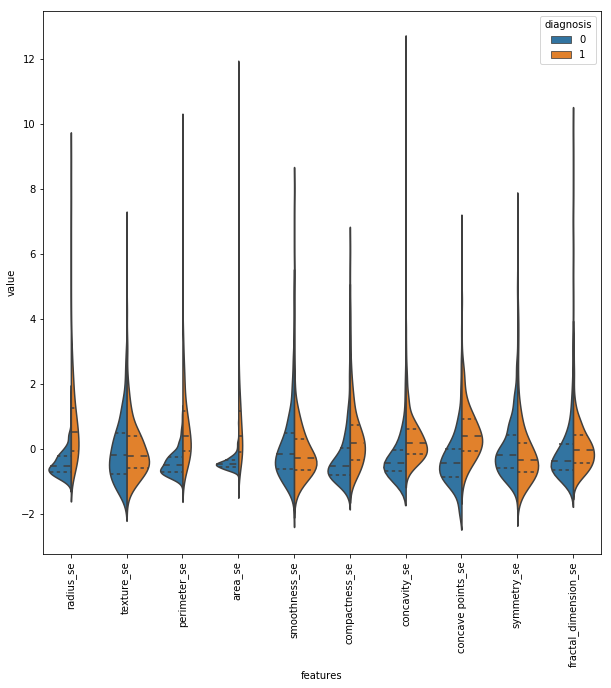

In [54]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

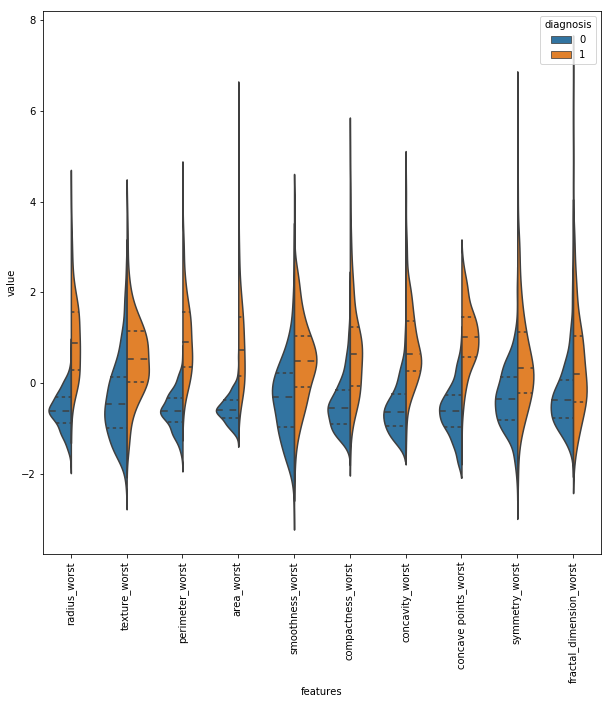

In [55]:
# Last ten features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

# Machine Learning 

In [56]:
"""To ease our job we will create a class 
This class has function based on various machine learning algorithm
We are using 5 algorithms which are as follows
1) Logistic Regression
2) Ada Boost Classifer
3) Decision Tree Classifier
4) Random Forest Classifier
5) K nearest neighbor classifier

The specific function when called will do the following:-
1) Fit the training data
2) Predict the training data
3) Predict the testing data
4) Give output as confusion-matrix, classification-report and Roc-Auc-Score for training as well as testing data. 
"""
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# to evaluate the models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics




class selmod():    
    def logr(x_tra,y_tra,x_tes,y_tes):
        print('Logistic Regression')
        print('\n')
        lr=LogisticRegression()
        lr.fit(x_tra,y_tra)
        
        print('Training Validation','\n')
        predtlr=lr.predict(x_tra)
        print('Confusion matrix: ','\n',metrics.confusion_matrix(y_tra,predtlr))
        print('\n')
        print('Classification report: ','\n',metrics.classification_report(y_tra,predtlr))
        print('\n')
        print('Roc-Auc-Score: ',roc_auc_score(y_tra,predtlr))
        print('\n')
        print('*'*80)
        
        print('Testing Validation')
        print('\n')
        predlr=lr.predict(x_tes)
        print('Confusion matrix: ','\n',metrics.confusion_matrix(y_tes,predlr))
        print('\n')
        print('Classification report: ','\n',metrics.classification_report(y_tes,predlr))
        print('\n')
        print('Roc-Auc-Score: ',roc_auc_score(y_tes,predlr))
        
    def dectree(x_tra,y_tra,x_tes,y_tes):
        print('Decision Tree Classifier')
        print('\n')
        dt=DecisionTreeClassifier()
        dt.fit(x_tra,y_tra)
        
        print('Training Validation','\n')
        predtdt=dt.predict(x_tra)
        print('Confusion matrix: ','\n',metrics.confusion_matrix(y_tra,predtdt))
        print('\n')
        print('Classification report: ','\n',metrics.classification_report(y_tra,predtdt))
        print('\n')
        print('Roc-Auc-Score: ',roc_auc_score(y_tra,predtdt))
        print('\n')
        print('*'*80)
        
        preddt=dt.predict(x_tes)
        print('Testing Validation','\n')
        print('Confusion matrix: ','\n',metrics.confusion_matrix(y_tes,preddt))
        print('\n')
        print('Classification report: ','\n',metrics.classification_report(y_tes,preddt))
        print('\n')
        print('Roc-Auc-Score: ',roc_auc_score(y_tes,preddt))
    
    def ranfo(x_tra,y_tra,x_tes,y_tes):
        print('Random Forest Classifier')
        print('\n')
        rf=RandomForestClassifier()
        rf.fit(x_tra,y_tra)
        
        print('Training Validation','\n')
        predtrf=rf.predict(x_tra)
        print('Confusion matrix: ','\n',metrics.confusion_matrix(y_tra,predtrf))
        print('\n')
        print('Classification report: ','\n',metrics.classification_report(y_tra,predtrf))
        print('\n')
        print('Roc-Auc-Score: ',roc_auc_score(y_tra,predtrf))
        print('\n')
        print('*'*80)
        
        predrf=rf.predict(x_tes)
        print('Confusion Matrix: ','\n',metrics.confusion_matrix(y_tes,predrf))
        print('\n')
        print('Classification Report: ','\n',metrics.classification_report(y_tes,predrf))
        print('\n')
        print('Roc-Auc-Score: ',roc_auc_score(y_tes,predrf))
    
    def ada(x_tra,y_tra,x_tes,y_tes):
        print('Ada Boost Classifier')
        print('\n')
        ad=AdaBoostClassifier()
        ad.fit(x_tra,y_tra)
        
        print('Training Validation','\n')
        predtad=ad.predict(x_tra)
        print('Confusion matrix: ','\n',metrics.confusion_matrix(y_tra,predtad))
        print('\n')
        print('Classification report: ','\n',metrics.classification_report(y_tra,predtad))
        print('\n')
        print('Roc-Auc-Score: ',roc_auc_score(y_tra,predtad))
        print('\n')
        print('*'*80)
        
        predad=ad.predict(x_tes)
        print('Confusion Matrix: ','\n',metrics.confusion_matrix(y_tes,predad))
        print('\n')
        print('Classification Report: ','\n',metrics.classification_report(y_tes,predad))
        print('\n')
        print('Roc-Auc-Score: ',roc_auc_score(y_tes,predad))
    
    def kneigh(x_tra,y_tra,x_tes,y_tes):
        print('KNN Classifier')
        print('\n')
        knn=KNeighborsClassifier()
        knn.fit(x_tra,y_tra)
        
        print('Training Validation','\n')
        predtkn=knn.predict(x_tra)
        print('Confusion matrix: ','\n',metrics.confusion_matrix(y_tra,predtkn))
        print('\n')
        print('Classification report: ','\n',metrics.classification_report(y_tra,predtkn))
        print('\n')
        print('Roc-Auc-Score: ',roc_auc_score(y_tra,predtkn))
        print('\n')
        print('*'*80)
        
        predkn=knn.predict(x_tes)
        print('Confusion Matrix: ','\n',metrics.confusion_matrix(y_tes,predkn))
        print('\n')
        print('Classification Report: ','\n',metrics.classification_report(y_tes,predkn))
        print('\n')
        print('Roc-Auc_Score: ',roc_auc_score(y_tes,predkn))

In [57]:
# Logistic Regression with normal data
selmod.logr(X_train,y_train,X_test,y_test)

Logistic Regression


Training Validation 

Confusion matrix:  
 [[245   7]
 [  9 137]]


Classification report:  
              precision    recall  f1-score   support

          0       0.96      0.97      0.97       252
          1       0.95      0.94      0.94       146

avg / total       0.96      0.96      0.96       398



Roc-Auc-Score:  0.9552891933028919


********************************************************************************
Testing Validation


Confusion matrix:  
 [[102   3]
 [  8  58]]


Classification report:  
              precision    recall  f1-score   support

          0       0.93      0.97      0.95       105
          1       0.95      0.88      0.91        66

avg / total       0.94      0.94      0.94       171



Roc-Auc-Score:  0.9251082251082251


In [58]:
# Decision Tree with normal data
selmod.dectree(X_train,y_train,X_test,y_test)

Decision Tree Classifier


Training Validation 

Confusion matrix:  
 [[252   0]
 [  0 146]]


Classification report:  
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       252
          1       1.00      1.00      1.00       146

avg / total       1.00      1.00      1.00       398



Roc-Auc-Score:  1.0


********************************************************************************
Testing Validation 

Confusion matrix:  
 [[99  6]
 [ 8 58]]


Classification report:  
              precision    recall  f1-score   support

          0       0.93      0.94      0.93       105
          1       0.91      0.88      0.89        66

avg / total       0.92      0.92      0.92       171



Roc-Auc-Score:  0.9108225108225109


In [59]:
# KNN classifier with normal data
selmod.kneigh(X_train,y_train,X_test,y_test)

KNN Classifier


Training Validation 

Confusion matrix:  
 [[245   7]
 [ 12 134]]


Classification report:  
              precision    recall  f1-score   support

          0       0.95      0.97      0.96       252
          1       0.95      0.92      0.93       146

avg / total       0.95      0.95      0.95       398



Roc-Auc-Score:  0.9450152207001523


********************************************************************************
Confusion Matrix:  
 [[100   5]
 [  8  58]]


Classification Report:  
              precision    recall  f1-score   support

          0       0.93      0.95      0.94       105
          1       0.92      0.88      0.90        66

avg / total       0.92      0.92      0.92       171



Roc-Auc_Score:  0.9155844155844156


In [60]:
# Ada Boost Classifier with normal data
selmod.ada(X_train,y_train,X_test,y_test)

Ada Boost Classifier


Training Validation 

Confusion matrix:  
 [[252   0]
 [  0 146]]


Classification report:  
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       252
          1       1.00      1.00      1.00       146

avg / total       1.00      1.00      1.00       398



Roc-Auc-Score:  1.0


********************************************************************************
Confusion Matrix:  
 [[104   1]
 [  4  62]]


Classification Report:  
              precision    recall  f1-score   support

          0       0.96      0.99      0.98       105
          1       0.98      0.94      0.96        66

avg / total       0.97      0.97      0.97       171



Roc-Auc-Score:  0.9649350649350651


In [61]:
# Randodm forest with normal data
selmod.ranfo(X_train,y_train,X_test,y_test)

Random Forest Classifier


Training Validation 

Confusion matrix:  
 [[252   0]
 [  2 144]]


Classification report:  
              precision    recall  f1-score   support

          0       0.99      1.00      1.00       252
          1       1.00      0.99      0.99       146

avg / total       1.00      0.99      0.99       398



Roc-Auc-Score:  0.9931506849315068


********************************************************************************
Confusion Matrix:  
 [[102   3]
 [  6  60]]


Classification Report:  
              precision    recall  f1-score   support

          0       0.94      0.97      0.96       105
          1       0.95      0.91      0.93        66

avg / total       0.95      0.95      0.95       171



Roc-Auc-Score:  0.9402597402597402


In [118]:
#It seems almost all the algorithms are overfitting the data except Logistic Regression and KNN
#To keep things simple we will feature engine only for logistic regression

# Feature Engineering

In [62]:
# Now we will standardize our data and look at the output
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

df_ss=ss.fit_transform(df.drop('diagnosis',axis=1))

df_ss=pd.DataFrame(data=df_ss,columns=X.columns)

df_ss['diagnosis']=df['diagnosis']

X_ss=df_ss.drop('diagnosis',axis=1)
y=df_ss['diagnosis']
X_train_ss, X_test_ss,y_train_ss, y_test_ss=train_test_split(X,y,test_size=0.3,random_state=101)

In [63]:
# Logistic Regression using standardized data
selmod.logr(X_train_ss, y_train_ss, X_test_ss, y_test_ss)

Logistic Regression


Training Validation 

Confusion matrix:  
 [[245   7]
 [  9 137]]


Classification report:  
              precision    recall  f1-score   support

          0       0.96      0.97      0.97       252
          1       0.95      0.94      0.94       146

avg / total       0.96      0.96      0.96       398



Roc-Auc-Score:  0.9552891933028919


********************************************************************************
Testing Validation


Confusion matrix:  
 [[102   3]
 [  8  58]]


Classification report:  
              precision    recall  f1-score   support

          0       0.93      0.97      0.95       105
          1       0.95      0.88      0.91        66

avg / total       0.94      0.94      0.94       171



Roc-Auc-Score:  0.9251082251082251


In [64]:
from sklearn.preprocessing import Normalizer, MinMaxScaler

In [65]:
nn= Normalizer()

mm = MinMaxScaler()

In [66]:
#Normalizing the data
df_nn=nn.fit_transform(df.drop('diagnosis',axis=1))

df_nn=pd.DataFrame(data=df_nn,columns=X.columns)

df_nn['diagnosis']=df['diagnosis']

X_nn=df_nn.drop('diagnosis',axis=1)
y=df_nn['diagnosis']
X_train_nn, X_test_nn,y_train_nn, y_test_nn=train_test_split(X,y,test_size=0.3,random_state=101)

In [67]:
#Min Max scaling the data
df_mm=mm.fit_transform(df.drop('diagnosis',axis=1))

df_mm=pd.DataFrame(data=df_nn,columns=X.columns)

df_mm['diagnosis']=df['diagnosis']

X_mm=df_mm.drop('diagnosis',axis=1)
y=df_mm['diagnosis']
X_train_mm, X_test_mm,y_train_mm, y_test_mm=train_test_split(X,y,test_size=0.3,random_state=101)

In [68]:
# Logistic Regression using normalized data
selmod.logr(X_train_nn, y_train_nn, X_test_nn, y_test_nn)

Logistic Regression


Training Validation 

Confusion matrix:  
 [[245   7]
 [  9 137]]


Classification report:  
              precision    recall  f1-score   support

          0       0.96      0.97      0.97       252
          1       0.95      0.94      0.94       146

avg / total       0.96      0.96      0.96       398



Roc-Auc-Score:  0.9552891933028919


********************************************************************************
Testing Validation


Confusion matrix:  
 [[102   3]
 [  8  58]]


Classification report:  
              precision    recall  f1-score   support

          0       0.93      0.97      0.95       105
          1       0.95      0.88      0.91        66

avg / total       0.94      0.94      0.94       171



Roc-Auc-Score:  0.9251082251082251


In [69]:
# Logistic Regression using min-maxed data
selmod.logr(X_train_mm, y_train_mm, X_test_mm, y_test_mm)

Logistic Regression


Training Validation 

Confusion matrix:  
 [[245   7]
 [  9 137]]


Classification report:  
              precision    recall  f1-score   support

          0       0.96      0.97      0.97       252
          1       0.95      0.94      0.94       146

avg / total       0.96      0.96      0.96       398



Roc-Auc-Score:  0.9552891933028919


********************************************************************************
Testing Validation


Confusion matrix:  
 [[102   3]
 [  8  58]]


Classification report:  
              precision    recall  f1-score   support

          0       0.93      0.97      0.95       105
          1       0.95      0.88      0.91        66

avg / total       0.94      0.94      0.94       171



Roc-Auc-Score:  0.9251082251082251


In [116]:
#Chekcing for outliers

for num_cols in X:
    print(num_cols)
    IQR = df[num_cols].quantile(0.75) - df[num_cols].quantile(0.25)
    
    Lower_fence = df[num_cols].quantile(0.25) - (IQR * 1.5)
    Upper_fence = df[num_cols].quantile(0.75) + (IQR * 1.5)
    print('Upper_fence',Upper_fence,'\n' 'Lower_fence', Lower_fence,'\n''IQR', IQR)
    print('Max',df[num_cols].max(),'\n''Min',df[num_cols].min())
    print('\n')

radius_mean
Upper_fence 21.9 
Lower_fence 5.579999999999999 
IQR 4.08
Max 28.11 
Min 6.981


texture_mean
Upper_fence 30.244999999999997 
Lower_fence 7.725000000000003 
IQR 5.629999999999999
Max 39.28 
Min 9.71


perimeter_mean
Upper_fence 147.49499999999998 
Lower_fence 31.775000000000013 
IQR 28.929999999999993
Max 188.5 
Min 43.79


area_mean
Upper_fence 1326.3000000000002 
Lower_fence -123.30000000000001 
IQR 362.40000000000003
Max 2501.0 
Min 143.5


smoothness_mean
Upper_fence 0.133695 
Lower_fence 0.057975 
IQR 0.018930000000000002
Max 0.1634 
Min 0.052629999999999996


compactness_mean
Upper_fence 0.22861999999999996 
Lower_fence -0.03329999999999997 
IQR 0.06547999999999998
Max 0.3454 
Min 0.01938


concavity_mean
Upper_fence 0.28241000000000005 
Lower_fence -0.12215000000000001 
IQR 0.10114000000000001
Max 0.4268 
Min 0.0


concave points_mean
Upper_fence 0.15453500000000003 
Lower_fence -0.06022500000000003 
IQR 0.053690000000000015
Max 0.2012 
Min 0.0


symmetry_mean
Upper_

In [70]:
"""Engineering outliers in the dataset

The estimator first calculates the capping values at the end of the
distribution for the indicated features. The values at the end of the
distribution can be given by the Gaussian limits or the quantile limits.

"""

# Importing library for engineering outliers
from feature_engine import outlier_removers

ww=outlier_removers.Windsorizer()

X_out=ww.fit_transform(X)

X_train_out, X_test_out, y_train_out,y_test_out=train_test_split(X_out,y,test_size=0.3,random_state=101)


# Logistic Regression using data without outliers
selmod.logr(X_train_out, y_train_out,X_test_out,y_test_out)



# Standardizing the data without outliers
X_out_ss=ss.fit_transform(X_out)

X_out_ss=pd.DataFrame(data=X_out_ss,columns=X.columns)

X_out_ss['diagnosis']=y

X_train_out_ss, X_test_out_ss, y_train_out_ss, y_test_out_ss = train_test_split(X_out_ss.drop('diagnosis',axis=1),X_out_ss['diagnosis'], test_size=0.33, random_state=42)

Logistic Regression


Training Validation 

Confusion matrix:  
 [[245   7]
 [  9 137]]


Classification report:  
              precision    recall  f1-score   support

          0       0.96      0.97      0.97       252
          1       0.95      0.94      0.94       146

avg / total       0.96      0.96      0.96       398



Roc-Auc-Score:  0.9552891933028919


********************************************************************************
Testing Validation


Confusion matrix:  
 [[102   3]
 [  8  58]]


Classification report:  
              precision    recall  f1-score   support

          0       0.93      0.97      0.95       105
          1       0.95      0.88      0.91        66

avg / total       0.94      0.94      0.94       171



Roc-Auc-Score:  0.9251082251082251


In [71]:
# Logistic Regression using standardized data without outliers
selmod.logr(X_train_out_ss,y_train_out_ss,X_test_out_ss,y_test_out_ss)

Logistic Regression


Training Validation 

Confusion matrix:  
 [[235   1]
 [  4 141]]


Classification report:  
              precision    recall  f1-score   support

          0       0.98      1.00      0.99       236
          1       0.99      0.97      0.98       145

avg / total       0.99      0.99      0.99       381



Roc-Auc-Score:  0.9840882524839275


********************************************************************************
Testing Validation


Confusion matrix:  
 [[120   1]
 [  1  66]]


Classification report:  
              precision    recall  f1-score   support

          0       0.99      0.99      0.99       121
          1       0.99      0.99      0.99        67

avg / total       0.99      0.99      0.99       188



Roc-Auc-Score:  0.9884050820278771


In [72]:
# Logistic Regression using min-max scaled data without outliers

X_out_mm=mm.fit_transform(X_out)

X_out_mm=pd.DataFrame(data=X_out_mm,columns=X.columns)

X_out_mm['diagnosis']=y

X_train_out_mm, X_test_out_mm, y_train_out_mm, y_test_out_mm= train_test_split(X_out_mm.drop('diagnosis',axis=1)
                                                                                ,X_out_mm['diagnosis'], 
                                                                                test_size=0.33,
                                                                                random_state=42)

selmod.logr(X_train_out_mm,y_train_out_mm,X_test_out_mm,y_test_out_mm)

Logistic Regression


Training Validation 

Confusion matrix:  
 [[235   1]
 [ 12 133]]


Classification report:  
              precision    recall  f1-score   support

          0       0.95      1.00      0.97       236
          1       0.99      0.92      0.95       145

avg / total       0.97      0.97      0.97       381



Roc-Auc-Score:  0.9565020455873757


********************************************************************************
Testing Validation


Confusion matrix:  
 [[121   0]
 [  4  63]]


Classification report:  
              precision    recall  f1-score   support

          0       0.97      1.00      0.98       121
          1       1.00      0.94      0.97        67

avg / total       0.98      0.98      0.98       188



Roc-Auc-Score:  0.9701492537313433


In [97]:
cols=['train','test']
train=np.array([95,1,94,1,99,95,95,95,95,98.4,95])
test=[92,91,91,96,95,92,92,92,92,98.8,97]
name=['Logistic Regeression','Decision Tree','KNN','AdaBoost Classifier','Random Forest','Standardised Logistic Regression',
     'Normalised Logisitic Regression','MinMaxed Logistic Regression','Windsorized Logistic Regression','Standardized Windsorized Logistic Regression','MinMaxed Windsorized Logistic Regression']

In [113]:
evaluate=pd.DataFrame(index=name,data=train,columns=['Training Accuracy'])

In [114]:
evaluate['Testing Accuracy']=test

In [115]:
evaluate

,Training Accuracy,Testing Accuracy
Logistic Regeression,95.0,92.0
Decision Tree,1.0,91.0
KNN,94.0,91.0
AdaBoost Classifier,1.0,96.0
Random Forest,99.0,95.0
Standardised Logistic Regression,95.0,92.0
Normalised Logisitic Regression,95.0,92.0
MinMaxed Logistic Regression,95.0,92.0
Windsorized Logistic Regression,95.0,92.0
Standardized Windsorized Logistic Regression,98.4,98.8


### Min-Maxed Logistic Regression without outliers seems to be the best fit with 97% test accuracy and 95% training accuracy
